## Best Selling Books 2018 from Amazon.com

#### This is a project where data is scraped from amazon.com for bestselling books in 2018. This notebook contains -

1. Webscraping code for top 100 books sold on amazon.com for the year 2018.
2. Webscraping code for top 100 books list from NYT.
3. Analytics and Insights drawn from the above data.

###  Analytics & Insights on top 100 books sold by Amazon

Some of the questions we can answer from the data are -

1. Which books got the highest star ratings ?
2. Which books got the max num of reviews ?
3. Which book got the max star rating and reviews ?
4. Which author's books has featured in the top 100 more than once ?
5. Which type of book has sold a lot ? (paperback or hardcover)
6. What is the price range, that is most present in the top 100 ?
7. What is the price range seen in books on top 10, 11-20 .... so on till 90-100 ?
8. which are the common books in the NYT list and Amazon top 100 books list ?
9. Genre of books that are in the common list ?


More questions which I would have liked to solve but didnt get credible data to verify for are - 

1. How many authors were women in the top 100 bestselling books list ?
2. Genre of books in the top 100 ?
3. Age-group of authors who made it to the top 100 books list.
4. Ethnic origins of authors.
5. Book Themes popular in 2018.

In [1]:
# Code for Scraping Data from Amazon website

# Code to scrape first 50 books present in first page on the website

# load the packages

Pckgs_For_This_R_Script = c( 'dplyr',    # Grammar of Data Manipulation
                               'stringr',  # Package for String handling 
                               'rvest',    # Package for Web Scraping 
                               'RCurl',    # Package for handling URLs
                               'maps',     # Drawing Maps in R 
                               'XML',      # Packages for processing XML
                               'xml2',
                               'ggplot2',
                               'plotly')   # Package for interactive Plotting
  
  
  sapply(Pckgs_For_This_R_Script , require , character.only = T)

#define the url
url <- "https://www.amazon.com/gp/bestsellers/2018/books"

#read the corresponding HTML for the url
amazon_html_page <- xml2::read_html(url)

# 1. Extract the 50 book rankings

Tag_Name <- '.zg-badge-text' 
amazon_Node <- html_nodes(amazon_html_page,Tag_Name)
amazon_book_Rank <- html_text(amazon_Node)

amazon_book_Rank <- str_replace_all(amazon_book_Rank,"\\#" ,"")
amazon_book_Rank <- as.numeric(amazon_book_Rank)
amazon_book_Rank

# 2. Extract Book names for top 50 books

Tag_book_name <- url %>%
  read_html() %>%
  html_nodes(xpath='//*[@id="zg-ordered-list"]/li/span/div/span/a/div') %>%
  html_text()
  
Tag_book_name <- str_replace_all(Tag_book_name,"\\n","")
Tag_book_name <- str_squish(Tag_book_name)
Tag_book_name <- str_split(Tag_book_name,":")
class(Tag_book_name)

for (i in 1:length(Tag_book_name)) {
  Tag_book_name[i] = Tag_book_name[[i]][1]
  
}

Tag_book_name
Tag_book_name <- unlist(Tag_book_name)


# 3. Extract Author names for each book
# here the website deign is complicated, hence use loop for xpath and then extract the names

author_num<- c("")
author_name <- character(0)



for (i in 1:50) {

  
  Xpath_Author <- str_c('//*[@id="zg-ordered-list"]/li[',
                        i,"]/span/div/span/div[1]/a")  
    
    temp <- amazon_html_page%>%
    html_nodes(xpath=Xpath_Author) %>%
    html_text()
    
    author_name <- c(author_name, if_else(
                    length(temp)>0,temp[1],""))
  
}

author_num
author_name

# 4. Extract star ratings for each book
#xpath_stars <- '//*[@id="zg-ordered-list"]/li[1]/span/div/span/div[2]/a[1]'
star_ratings <- character(0)
for (i in 1:50){
  
  xpath_stars <- str_c('//*[@id="zg-ordered-list"]/li[',i,']/span/div/span/div[2]/a[1]')
  star_ratings[i] <- amazon_html_page %>% html_nodes(xpath = xpath_stars) %>%
    html_text()
}

star_ratings

star_ratings <- str_replace_all(star_ratings,"\\n","")
star_ratings <- str_squish(star_ratings)
star_ratings <- str_sub(star_ratings,1,3)
#there r 2 NA values as it is cost instead of ratings
star_ratings <- as.numeric(star_ratings)
star_ratings <- ifelse(is.na(star_ratings),0,star_ratings)

# 5. Extract number of reviews for each book
#41 , 26 has character(0) value so na and then convrted to zero.
reviews <- character(0)
for (i in 1:50) {
  
  xpath_reviews <- str_c('//*[@id="zg-ordered-list"]/li[',i,']/span/div/span/div[2]/a[2]')
    
  temp <- amazon_html_page %>%
                html_nodes(xpath=xpath_reviews) %>% html_text()
  reviews <- c(reviews,if_else(length(temp)>0,temp[1],""))
  
}
reviews <- str_replace(reviews,",","")
reviews <- as.numeric(reviews)
reviews <- ifelse(is.na(reviews),0,reviews)

# 6. Extract type of book
type <- character(0)

for (i in 1:50) {
xpath_type <- str_c('//*[@id="zg-ordered-list"]/li[',i,']/span/div/span/div[3]/span')
temp <- amazon_html_page %>%
  html_nodes(xpath=xpath_type) %>% html_text()

type <- c(type,if_else(length(temp)>0, temp[1], ""))


}

type

# 7. Extract price of book
# 2 missing values @ 26 and @ 41

price1 <- character(0)

for (i in 1:50) {
xpath_price <- str_c('//*[@id="zg-ordered-list"]/li[',i,']/span/div/span/div[4]/a/span/span')

temp <- amazon_html_page %>%
                     html_nodes(xpath=xpath_price) %>% html_text()
                     
                     price1 <- c(price1,if_else(length(temp)>0, temp[1], ""))
                     
}

price1 <- str_sub(price1,2,-1)
price1 <- as.numeric(price1)

# handle na which occurs during coercion
price1 <- ifelse(is.na(price1),0,price1)


#####################################################################################################################
# Web scraping for books 51 to 100 presend in second page
######################################################################################################################

url2 <- 'https://www.amazon.com/gp/bestsellers/2018/books/ref=zg_bsar_pg_2?ie=UTF8&pg=2'

# 1. Book Rank
xpath_rank2 <- '//*[@id="zg-ordered-list"]/li/span/div/div/span[1]/span'

rank2 <- url2 %>% read_html() %>% html_nodes(xpath = xpath_rank2) %>% 
          html_text()
rank2 <- str_remove(rank2,'#') %>% as.numeric()

#-----------------------------------------------------------------

# 2. Book Name
xpath_name2 <- '//*[@id="zg-ordered-list"]/li/span/div/span/a/div'

book2 <- url2 %>% read_html() %>% html_nodes(xpath = xpath_name2) %>% 
  html_text()

book2 <- str_remove_all(book2,'\n') %>% str_trim()
book2 <- str_split(book2,":") %>% lapply(function(x){x[1]}) %>% unlist()

#----------------------------------------------------------------------

# 3. Author
author2 <- character(0)
html_url2 <- url2 %>% read_html()
for(i in 1:50) {
  
  xpath_author2 <- str_c('//*[@id="zg-ordered-list"]/li[',i,']/span/div/span/div[1]/a')  
  print(i)
  
  temp_auth <- html_url2 %>% html_nodes(xpath = xpath_author2) %>% 
  html_text()

  author2 <- c(author2,if_else(length(temp_auth)>0, temp_auth[1],""))
             }
author2
#-------------------------------------------------
# 4. Star ratings
xpath_star2 <- '//*[@id="zg-ordered-list"]/li/span/div/span/div[2]/a[1]/i/span'

ratings2 <- url2 %>% read_html() %>% html_nodes(xpath = xpath_star2) %>% 
  html_text()

ratings2 <- str_sub(ratings2,1,3) %>% as.numeric()

#--------------------------------------------------------------------------
  
# 5. Number of reviews
xpath_reviews <- '//*[@id="zg-ordered-list"]/li/span/div/span/div[2]/a[2]'
reviews2 <- url2 %>% read_html() %>% html_nodes(xpath = xpath_reviews) %>% 
  html_text()

reviews2 <- str_remove(reviews2,",") %>% as.numeric()

#--------------------------------------------------------------------------

# 6. Type of book

xpath_booktype <- '//*[@id="zg-ordered-list"]/li/span/div/span/div[3]/span'
type2 <- url2 %>% read_html() %>% html_nodes(xpath = xpath_booktype) %>% 
  html_text()

#------------------------------------------------------------------------

# 7. Price

price2 <- character(0)
html_var <- read_html(url2)
for (i in 1:50) {
  
xpath_price <-str_c('//*[@id="zg-ordered-list"]/li[',i,']/span/div/span/div[4]/a/span/span')
temp_price <- html_var %>% html_nodes(xpath = xpath_price) %>% 
  html_text()

price2 <- c(price2, ifelse(length(temp_price)>0,temp_price[1],""))

}

price2 <- str_sub(price2,2,-1) %>% as.numeric()
price2 <- ifelse(is.na(price2),0,price2)





#######################################################################
#                   Combined data for 100 books                   #
####################################################################

# 1. Book rank
book_rank <- c(amazon_book_Rank,rank2 ) 

# 2. Book name
book_name <- c(Tag_book_name,book2)

# 3. Author Name
author <- c(author_name,author2)

# 4. star ratings
stars <- c(star_ratings,ratings2)

# 5. Number of reviews
reviews <- c(reviews,reviews2)

# 6. Type of book
book_type <- c(type,type2)
# 7. Price
price <- character(0)
price <- c(price1,price2)

# create combined tibble for all 100 books. 
amazon_books <- tibble(book_rank,book_name,author,stars,
                       reviews,book_type,price)

Loading required package: dplyr

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: stringr
Loading required package: rvest
Loading required package: xml2
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
Loading required package: RCurl
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'RCurl'"Loading required package: maps
Loading required package: XML
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'XML'"Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Loading required package: plotly
Wa

dplyr stringr   rvest   RCurl    maps     XML    xml2 ggplot2  plotly 
   TRUE    TRUE    TRUE   FALSE    TRUE   FALSE    TRUE    TRUE   FALSE

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
[26] 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50

[1] "list"

[[1]]
[1] "Becoming"

[[2]]
[1] "Girl, Wash Your Face"

[[3]]
[1] "The Wonky Donkey"

[[4]]
[1] "Fire and Fury"

[[5]]
[1] "Fear"

[[6]]
[1] "Last Week Tonight with John Oliver Presents A Day in the Life of Marlon Bundo (Better Bundo Book, LGBT Children<U+0092>s Book)"

[[7]]
[1] "12 Rules for Life"

[[8]]
[1] "Magnolia Table"

[[9]]
[1] "Whose Boat Is This Boat?"

[[10]]
[1] "The Subtle Art of Not Giving a F*ck"

[[11]]
[1] "A Higher Loyalty"

[[12]]
[1] "The Complete Ketogenic Diet for Beginners"

[[13]]
[1] "Diary of a Wimpy Kid #13"

[[14]]
[1] "The 5 Love Languages"

[[15]]
[1] "First 100 Words"

[[16]]
[1] "Dog Man"

[[17]]
[1] "Educated"

[[18]]
[1] "You Are a Badass®"

[[19]]
[1] "The Plant Paradox"

[[20]]
[1] "Giraffes Can't Dance"

[[21]]
[1] "Player's Handbook (Dungeons & Dragons)"

[[22]]
[1] "Homebody"

[[23]]
[1] "The Very Hungry Caterpillar"

[[24]]
[1] "Crazy Rich Asians (Crazy Rich Asians Trilogy)"

[[25]]
[1] "The Hate U Give"

[[26]]
[1] "The Instant Pot Electric Pressure Cooker Cookbook"

[[27]]
[1] "The Four Agreements"

[[28]]
[1] "The Wonderful Things You Will Be"

[[29]]
[1] "P is for Potty! (Sesame Street) (Lift-the-Flap)"

[[30]]
[1] "The Pout-Pout Fish"

[[31]]
[1] "Lettering and Modern Calligraphy"

[[32]]
[1] "Publication Manual of the American Psychological Association, 6th Edition"

[[33]]
[1] "Dear Zoo"

[[34]]
[1] "Oh, the Places You'll Go!"

[[35]]
[1] "Dog Man and Cat Kid"

[[36]]
[1] "Goodnight Moon"

[[37]]
[1] "Salt, Fat, Acid, Heat"

[[38]]
[1] "A Wrinkle in Time (Time Quintet)"

[[39]]
[1] "How to Win Friends & Influence People"

[[40]]
[1] "Dog Man"

[[41]]
[1] "Instant Pot Pressure Cooker Cookbook"

[[42]]
[1] "Milk and Honey"

[[43]]
[1] "Little Fires Everywhere"

[[44]]
[1] "Kitchen Confidential Updated Edition"

[[45]]
[1] "The President Is Missing"

[[46]]
[1] "School Zone - Big Preschool Workbook - Ages 3 to 5, Colors, Shapes, Numbers 1-10, Alphabet, Pre-Writing, Pre-Reading, and Phonics (School Zone Big Workbook Series)"

[[47]]
[1] "The Plant Paradox Cookbook"

[[48]]
[1] "Ready Player One"

[[49]]
[1] "Fahrenheit 451"

[[50]]
[1] "Ship of Fools"

[1] 1
[1] "Michelle Obama"
[1] 2
[1] "Rachel Hollis"
[1] 3
[1] "Craig Smith"
[1] 4
[1] "Michael Wolff"
[1] 5
[1] "Bob Woodward"
[1] 6
[1] "Jill Twiss"
[1] 7
[1] "Jordan B. Peterson"
[1] 8
[1] "Joanna Gaines"
[1] 9
[1] "The Staff of The Late Show with<U+0085>"
[1] 10
[1] "Mark Manson"
[1] 11
[1] "James Comey"
[1] 12
[1] "Amy Ramos"
[1] 13
[1] "Jeff Kinney"
[1] 14
[1] "Gary Chapman"
[1] 15
[1] "Roger Priddy"
[1] 16
[1] "Dav Pilkey"
[1] 17
[1] "Tara Westover"
[1] 18
[1] "Jen Sincero"
[1] 19
[1] "Dr. Steven R Gundry MD"
[1] 20
[1] "Giles Andreae"
[1] 21
[1] "Wizards RPG Team"
[1] 22
[1] "Joanna Gaines"
[1] 23
[1] "Eric Carle"
[1] 24
[1] "Kevin Kwan"
[1] 25
[1] "Angie Thomas"
[1] 26
[1] "\n                4.0 out of 5 stars\n            "
[2] "2,810"                                             
[1] 27
[1] "Don Miguel Ruiz"
[1] 28
[1] "Emily Winfield Martin"
[1] 29
character(0)
[1] 30
[1] "Deborah Diesen"
[1] 31
character(0)
[1] 32
character(0)
[1] 33
[1] "Rod Campbell"
[1] 34
[1] "Dr. Seuss

[1] "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12" "13" "14" "15"
[16] "16" "17" "18" "19" "20" "21" "22" "23" "24" "25" "26" "27" "28" "29" "30"
[31] "31" "32" "33" "34" "35" "36" "37" "38" "39" "40" "41" "42" "43" "44" "45"
[46] "46" "47" "48" "49" "50"

[1] "Michelle Obama"                                    
 [2] "Rachel Hollis"                                     
 [3] "Craig Smith"                                       
 [4] "Michael Wolff"                                     
 [5] "Bob Woodward"                                      
 [6] "Jill Twiss"                                        
 [7] "Jordan B. Peterson"                                
 [8] "Joanna Gaines"                                     
 [9] "The Staff of The Late Show with<U+0085>"           
[10] "Mark Manson"                                       
[11] "James Comey"                                       
[12] "Amy Ramos"                                         
[13] "Jeff Kinney"                                       
[14] "Gary Chapman"                                      
[15] "Roger Priddy"                                      
[16] "Dav Pilkey"                                        
[17] "Tara Westover"                                     
[18] "Jen Sincero"                                       
[19] "Dr. Steven R Gundry MD"                            
[20] "Giles Andreae"                                     
[21] "Wizards RPG Team"                                  
[22] "Joanna Gaines"                                     
[23] "Eric Carle"                                        
[24] "Kevin Kwan"                                        
[25] "Angie Thomas"                                      
[26] "\n                4.0 out of 5 stars\n            "
[27] "Don Miguel Ruiz"                                   
[28] "Emily Winfield Martin"                             
[29] ""                                                  
[30] "Deborah Diesen"                                    
[31] ""                                                  
[32] ""                                                  
[33] "Rod Campbell"                                      
[34] "Dr. Seuss"                                         
[35] "Dav Pilkey"                                        
[36] "Margaret Wise Brown"                               
[37] "Samin Nosrat"                                      
[38] "Madeleine L'Engle"                                 
[39] "Dale Carnegie"                                     
[40] "Dav Pilkey"                                        
[41] ""                                                  
[42] "Rupi Kaur"                                         
[43] "Celeste Ng"                                        
[44] "Anthony Bourdain"                                  
[45] "James Patterson"                                   
[46] "School Zone"                                       
[47] "Dr. Steven R Gundry MD"                            
[48] "Ernest Cline"                                      
[49] "Ray Bradbury"                                      
[50] "Tucker Carlson"

[1] 1
[1] "\n                4.9 out of 5 stars\n            "
[1] 2
[1] "\n                4.6 out of 5 stars\n            "
[1] 3
[1] "\n                4.7 out of 5 stars\n            "
[1] 4
[1] "\n                4.2 out of 5 stars\n            "
[1] 5
[1] "\n                4.5 out of 5 stars\n            "
[1] 6
[1] "\n                4.9 out of 5 stars\n            "
[1] 7
[1] "\n                4.6 out of 5 stars\n            "
[1] 8
[1] "\n                4.7 out of 5 stars\n            "
[1] 9
[1] "\n                4.5 out of 5 stars\n            "
[1] 10
[1] "\n                4.4 out of 5 stars\n            "
[1] 11
[1] "\n                4.7 out of 5 stars\n            "
[1] 12
[1] "\n                4.1 out of 5 stars\n            "
[1] 13
[1] "\n                4.8 out of 5 stars\n            "
[1] 14
[1] "\n                4.8 out of 5 stars\n            "
[1] 15
[1] "\n                4.6 out of 5 stars\n            "
[1] 16
[1] "\n                4.9 out of 5 stars\

[1] "\n                4.9 out of 5 stars\n            "
 [2] "\n                4.6 out of 5 stars\n            "
 [3] "\n                4.7 out of 5 stars\n            "
 [4] "\n                4.2 out of 5 stars\n            "
 [5] "\n                4.5 out of 5 stars\n            "
 [6] "\n                4.9 out of 5 stars\n            "
 [7] "\n                4.6 out of 5 stars\n            "
 [8] "\n                4.7 out of 5 stars\n            "
 [9] "\n                4.5 out of 5 stars\n            "
[10] "\n                4.4 out of 5 stars\n            "
[11] "\n                4.7 out of 5 stars\n            "
[12] "\n                4.1 out of 5 stars\n            "
[13] "\n                4.8 out of 5 stars\n            "
[14] "\n                4.8 out of 5 stars\n            "
[15] "\n                4.6 out of 5 stars\n            "
[16] "\n                4.9 out of 5 stars\n            "
[17] "\n                4.7 out of 5 stars\n            "
[18] "\n                4.6 out of 5 stars\n            "
[19] "\n                4.3 out of 5 stars\n            "
[20] "\n                4.6 out of 5 stars\n            "
[21] "\n                4.6 out of 5 stars\n            "
[22] "\n                4.6 out of 5 stars\n            "
[23] "\n                4.6 out of 5 stars\n            "
[24] "\n                4.2 out of 5 stars\n            "
[25] "\n                4.8 out of 5 stars\n            "
[26] "$12.62"                                            
[27] "\n                4.6 out of 5 stars\n            "
[28] "\n                4.8 out of 5 stars\n            "
[29] "\n                4.4 out of 5 stars\n            "
[30] "\n                4.8 out of 5 stars\n            "
[31] "\n                4.3 out of 5 stars\n            "
[32] "\n                4.3 out of 5 stars\n            "
[33] "\n                4.8 out of 5 stars\n            "
[34] "\n                4.8 out of 5 stars\n            "
[35] "\n                4.9 out of 5 stars\n            "
[36] "\n                4.7 out of 5 stars\n            "
[37] "\n                4.8 out of 5 stars\n            "
[38] "\n                4.5 out of 5 stars\n            "
[39] "\n                4.6 out of 5 stars\n            "
[40] "\n                4.9 out of 5 stars\n            "
[41] "\n                4.5 out of 5 stars\n            "
[42] "\n                4.6 out of 5 stars\n            "
[43] "\n                4.3 out of 5 stars\n            "
[44] "\n                4.6 out of 5 stars\n            "
[45] "\n                4.3 out of 5 stars\n            "
[46] "\n                4.8 out of 5 stars\n            "
[47] "\n                4.3 out of 5 stars\n            "
[48] "\n                4.6 out of 5 stars\n            "
[49] "\n                4.4 out of 5 stars\n            "
[50] "\n                4.8 out of 5 stars\n            "

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"

[1] 1
[1] "14,110"
[1] 2
[1] "10,393"
[1] 3
[1] "5,313"
[1] 4
[1] "9,908"
[1] 5
[1] "3,181"
[1] 6
[1] "8,506"
[1] 7
[1] "4,989"
[1] 8
[1] "1,935"
[1] 9
[1] "2,471"
[1] 10
[1] "5,380"
[1] 11
[1] "4,738"
[1] 12
[1] "2,027"
[1] 13
[1] "632"
[1] 14
[1] "14,526"
[1] 15
[1] "9,986"
[1] 16
[1] "660"
[1] 17
[1] "7,507"
[1] 18
[1] "4,464"
[1] 19
[1] "2,187"
[1] 20
[1] "3,863"
[1] 21
[1] "3,356"
[1] 22
[1] "552"
[1] 23
[1] "4,557"
[1] 24
[1] "3,617"
[1] 25
[1] "3,446"
[1] 26
character(0)
[1] 27
[1] "7,854"
[1] 28
[1] "1,955"
[1] 29
[1] "1,581"
[1] 30
[1] "2,981"
[1] 31
[1] "869"
[1] 32
[1] "4,612"
[1] 33
[1] "2,949"
[1] 34
[1] "7,662"
[1] 35
[1] "707"
[1] 36
[1] "3,412"
[1] 37
[1] "818"
[1] 38
[1] "3,597"
[1] 39
[1] "7,880"
[1] 40
[1] "677"
[1] 41
[1] "2,150"
[1] 42
[1] "6,499"
[1] 43
[1] "4,037"
[1] 44
[1] "3,425"
[1] 45
[1] "6,358"
[1] 46
[1] "1,165"
[1] 47
[1] "563"
[1] 48
[1] "18,911"
[1] 49
[1] "3,468"
[1] 50
[1] "1,767"
[1] 1
[1] "Hardcover"
[1] 2
[1] "Hardcover"
[1] 3
[1] "Paperback"
[1] 

[1] "Hardcover"  "Hardcover"  "Paperback"  "Hardcover"  "Hardcover" 
 [6] "Hardcover"  "Hardcover"  "Hardcover"  "Hardcover"  "Hardcover" 
[11] "Hardcover"  "Paperback"  "Hardcover"  "Paperback"  "Board book"
[16] "Hardcover"  "Hardcover"  "Paperback"  "Hardcover"  "Board book"
[21] "Hardcover"  "Hardcover"  "Board book" "Paperback"  "Hardcover" 
[26] ""           "Paperback"  "Hardcover"  "Board book" "Board book"
[31] "Paperback"  "Paperback"  "Board book" "Hardcover"  "Hardcover" 
[36] "Board book" "Hardcover"  "Paperback"  "Paperback"  "Hardcover" 
[41] "Paperback"  "Paperback"  "Hardcover"  "Paperback"  "Hardcover" 
[46] "Paperback"  "Hardcover"  "Paperback"  "Paperback"  "Hardcover"

[1] 1
[1] "$19.50"
[1] 2
[1] "$13.63"
[1] 3
[1] "$4.99"
[1] 4
[1] "$16.79"
[1] 5
[1] "$16.49"
[1] 6
[1] "$10.33"
[1] 7
[1] "$15.57"
[1] 8
[1] "$19.98"
[1] 9
[1] "$11.62"
[1] 10
[1] "$14.99"
[1] 11
[1] "$13.95"
[1] 12
[1] "$7.19"
[1] 13
[1] "$11.51"
[1] 14
[1] "$9.59"
[1] 15
[1] "$4.99"
[1] 16
[1] "$9.85"
[1] 17
[1] "$15.18"
[1] 18
[1] "$8.98"
[1] 19
[1] "$14.81"
[1] 20
[1] "$5.00"
[1] 21
[1] "$29.08"
[1] 22
[1] "$28.38"
[1] 23
[1] "$5.60"
[1] 24
[1] "$8.80"
[1] 25
[1] "$13.95"
[1] 26
character(0)
[1] 27
[1] "$6.48"
[1] 28
[1] "$10.79"
[1] 29
[1] "$5.99"
[1] 30
[1] "$5.00"
[1] 31
[1] "$6.02"
[1] 32
[1] "$27.99"
[1] 33
[1] "$5.00"
[1] 34
[1] "$10.99"
[1] 35
[1] "$8.38"
[1] 36
[1] "$6.53"
[1] 37
[1] "$21.87"
[1] 38
[1] "$6.19"
[1] 39
[1] "$9.60"
[1] 40
[1] "$6.35"
[1] 41
[1] "$12.05"
[1] 42
[1] "$7.08"
[1] 43
[1] "$14.99"
[1] 44
[1] "$11.69"
[1] 45
[1] "$15.21"
[1] 46
[1] "$6.69"
[1] 47
[1] "$18.11"
[1] 48
[1] "$12.51"
[1] 49
[1] "$8.27"
[1] 50
[1] "$19.50"
[1] 1
[1] "Paulo Coelho"
[1] 2


[1] "Paulo Coelho"          "R. J. Palacio"         "Harper Lee"           
 [4] ""                      "Leanne Vogel"          "Bob Goff"             
 [7] "Lisa Wingate"          "John Grisham"          ""                     
[10] "Mark Sullivan"         "Heidi Murkoff"         "Ray Dalio"            
[13] "Neil deGrasse Tyson"   "Rob Elliott"           "Anthony William"      
[16] "The College Board"     "Sasha O'Hara"          ""                     
[19] "Stephen King"          "Delia Owens"           "Wizards RPG Team"     
[22] "Yuval Noah Harari"     "Robert Munsch"         "Adam Rubin"           
[25] "A. J. Finn"            "Wizards RPG Team"      "Suzanne Ryan"         
[28] "Tom Rath"              "Jocko Willink"         "Gregg Jarrett"        
[31] "Dan Green"             "Rupi Kaur"             "Marie Kondo"          
[34] "Jen Fisch"             "Brianna Caplan Sayres" "Stephen R. Covey"     
[37] "Reese Witherspoon"     "Viktor E. Frankl"      "Kristin Hannah"       
[40] "Dave Ramsey"           "Chrissy Teigen"        "Margaret Atwood"      
[43] "Brené Brown"           "F. Scott Fitzgerald"   ""                     
[46] "Lin-Manuel Miranda"    "Robert T. Kiyosaki"    "William H. McRaven"   
[49] "J. K. Rowling"         "Wizards RPG Team"

In [13]:
# code to scrape data from NYT website


# 1. Hardcover fiction (hcf)
url1 <- 'https://www.barnesandnoble.com/b/the-new-york-times-bestsellers-hardcover-fiction/_/N-1p3r'
hcf_xpath <- '//*[@id="listView_"]/ol/li/div/div[3]/div[1]/h3/a'

hc_fiction <- url1 %>% read_html() %>% html_nodes(xpath = hcf_xpath) %>%
                  html_text()


# 2. Hardcover nonfiction
url2 <- 'https://www.barnesandnoble.com/b/the-new-york-times-bestsellers-hardcover-nonfiction/_/N-1p5q'
hc_nfic_xpath <- '//*[@id="listView_"]/ol/li/div/div[3]/div[1]/h3/a'

hc_non_fiction <- url2 %>% read_html() %>% html_nodes(xpath = hc_nfic_xpath) %>%
  html_text()

# 3. paperback fiction

url3 <- 'https://www.barnesandnoble.com/b/the-new-york-times-bestsellers-trade-paperback-fiction/_/N-1p3v'
pb_fic_xpath <- '//*[@id="listView_"]/ol/li/div/div[3]/div[1]/h3/a'

pb_fiction <- url3 %>% read_html() %>% html_nodes(xpath = pb_fic_xpath) %>%
  html_text()

# 4. paperback nonfiction

url4 <- 'https://www.barnesandnoble.com/b/the-new-york-times-bestsellers-paperback-nonfiction/_/N-1p3u'
pb_nonfic_xpath <- '//*[@id="listView_"]/ol/li/div/div[3]/div[1]/h3/a'

pb_non_fiction <- url4 %>% read_html() %>% html_nodes(xpath = pb_nonfic_xpath) %>%
  html_text()

# 5. Advice, How-To & Miscellaneous

url5 <- 'https://www.barnesandnoble.com/b/the-new-york-times-bestsellers-advice-how-to-miscellaneous/_/N-1p3o'
misc_xpath <- '//*[@id="listView_"]/ol/li/div/div[3]/div[1]/h3/a'

misc <- url5 %>% read_html() %>% html_nodes(xpath = misc_xpath) %>%
  html_text()

# 6. Children's Picture books

url6 <- 'https://www.barnesandnoble.com/b/the-new-york-times-bestsellers-childrens-picture-books/_/N-1p3p'
children_pic_xpath <- '//*[@id="listView_"]/ol/li/div/div[3]/div[1]/h3/a'

children1 <- url6 %>% read_html() %>% html_nodes(xpath = children_pic_xpath) %>%
  html_text()

# 7. Middle grade hardcover
url7 <- 'https://www.barnesandnoble.com/b/the-new-york-times-bestsellers-middle-grade-hardcover/_/N-1p3t'
mid_grade_xpath <- '//*[@id="listView_"]/ol/li/div/div[3]/div[1]/h3/a'

middle_grade <- url7 %>% read_html() %>% html_nodes(xpath = mid_grade_xpath) %>%
  html_text()

# 8. Young Adult hardcover

url8 <- 'https://www.barnesandnoble.com/b/the-new-york-times-bestsellers-young-adult-hardcover/_/N-1p3w'
young_adult_xpath <- '//*[@id="listView_"]/ol/li/div/div[3]/div[1]/h3/a'

young_adult <- url8 %>% read_html() %>% html_nodes(xpath = young_adult_xpath) %>%
  html_text()

# 9. Children's series

url9 <- 'https://www.barnesandnoble.com/b/the-new-york-times-bestsellers-childrens-series/_/N-1p3q'
children2_xpath <- '//*[@id="listView_"]/ol/li/div/div[3]/div[1]/h3/a'

children2 <- url9 %>% read_html() %>% html_nodes(xpath = children2_xpath) %>%
  html_text()

# combining similar genres
children <- c(children1,children2)
children <- c(children,middle_grade)
genre <- rep("children",30)

# create tibble with book name and genre
nyt_tibble <- tibble(book_name = children, genre)


fiction <- c(hc_fiction,pb_fiction)
genre_fic <- rep("fiction",30)
fict_tibble <- tibble(book_name = fiction, genre = genre_fic)

non_fiction <- c(hc_non_fiction,pb_non_fiction)
genre_nonfic <- rep("non-fiction",30)
nonfic_tibble <- tibble(book_name = non_fiction, genre = genre_nonfic)

genre_misc <- rep("misc",10)
misc_tibble <- tibble(book_name = misc, genre = genre_misc)

genre_youngAdult <- rep("young_adult",10)
youngAdult_tibble <- tibble(book_name = young_adult, genre = genre_youngAdult)

# combine all genre tibbles

nyt_tibble <- bind_rows(nyt_tibble,fict_tibble,nonfic_tibble,misc_tibble,youngAdult_tibble)

In [14]:
nyt_tibble

book_name,genre
The Wonderful Things You Will Be,children
Dragons Love Tacos,children
I Wish You More,children
I Love Dad with The Very Hungry Caterpillar,children
Grumpy Monkey,children
What Do You Do with a Chance?,children
"Dear Girl,",children
My Heart,children
Because I Had a Teacher,children
The Day the Crayons Quit,children


### EDA 

In [15]:
# 1. Are there any na values in the data frame ?
#checking column wise
is.na(amazon_books$book_rank) %>% sum()
is.na(amazon_books$book_name) %>% sum()
is.na(amazon_books$author) %>% sum()
is.na(amazon_books$stars) %>% sum()
is.na(amazon_books$reviews) %>% sum()
is.na(amazon_books$book_type) %>% sum()
is.na(amazon_books$price) %>% sum()


[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

In [17]:
# 2. Are there any missing values(NAs) in the data frame ?

complete.cases(amazon_books) %>% sum()

[1] 100

In [21]:
# 3. Update a few missing values manually

#Deal with numeric values-----------------------

amazon_books[which(amazon_books$price == 0),]

#update PRICE values manually which was not captured by webscraping

amazon_books$price[88] <- 3.79
amazon_books$price[26] <- 12.62
amazon_books$price[41] <- 12.59

#STARS
amazon_books[which(amazon_books$stars == 0),]
amazon_books$stars[26] <- 4.0
amazon_books$stars[41] <- 4.5

#REVIEWS

amazon_books[which(amazon_books$reviews == 0),]
amazon_books$reviews[26] <- 2810
amazon_books$reviews[41] <- 2149


#deal with string values-----------------------------
# BOOK NAME 
amazon_books[which(amazon_books$book_name == ""),]


# AUTHOR
amazon_books[which(amazon_books$author == ""),]


amazon_books$author[29] <- "Naomi Kleinberg"
amazon_books$author[31] <- "Paper Peony Press"
amazon_books$author[32] <- "6th Edition Publication Manual of the American Psychological Association (Author)
"
amazon_books$author[54] <- "Melissa Hartwig;Dallas Hartwig"
amazon_books$author[59] <- "Bill Martin Jr."
amazon_books$author[68] <- "Valorie Schaefer"
amazon_books$author[95] <- "Bessel van der Kolk M.D."

amazon_books[which(str_detect(amazon_books$author,"4")),]

amazon_books$author[26] <- "Instant Pot CookBook"
amazon_books$author[41] <- "Instant Pot CookBook"

# TYPE
amazon_books[which(amazon_books$book_type == ""),]

amazon_books$book_type[26] <- ""
amazon_books$book_type[41] <- "Paperback"


book_rank,book_name,author,stars,reviews,book_type,price


book_rank,book_name,author,stars,reviews,book_type,price
26,The Instant Pot Electric Pressure Cooker Cookbook,4.0 out of 5 stars,0,0,,12.62


book_rank,book_name,author,stars,reviews,book_type,price
26,The Instant Pot Electric Pressure Cooker Cookbook,4.0 out of 5 stars,4,0,,12.62


book_rank,book_name,author,stars,reviews,book_type,price


book_rank,book_name,author,stars,reviews,book_type,price
29,P is for Potty! (Sesame Street) (Lift-the-Flap),,4.4,1581,Board book,5.99
31,Lettering and Modern Calligraphy,,4.3,869,Paperback,6.02
32,"Publication Manual of the American Psychological Association, 6th Edition",,4.3,4612,Paperback,27.99
41,Instant Pot Pressure Cooker Cookbook,,4.5,2149,Paperback,12.59
54,The Whole30,,4.6,3474,Hardcover,17.80
59,"Brown Bear, Brown Bear, What Do You See?",,4.8,3027,Board book,7.99
68,The Care and Keeping of You,,4.8,2830,Paperback,8.89
95,The Body Keeps the Score,,4.8,1979,Paperback,10.80


book_rank,book_name,author,stars,reviews,book_type,price
26,The Instant Pot Electric Pressure Cooker Cookbook,4.0 out of 5 stars,4,2810,,12.62


book_rank,book_name,author,stars,reviews,book_type,price
26,The Instant Pot Electric Pressure Cooker Cookbook,Instant Pot CookBook,4,2810,,12.62


###  Analytics & Insights on top 100 books sold by Amazon

Some of the questions we can answer are -

1. Which books got the highest star ratings ?
2. Which books got the max num of reviews ?
3. Which book got the max star rating and reviews ?
4. Which author's books has featured in the top 100 more than once ?
5. Which type of book has sold a lot ? (paperback or hardcover)
6. What is the price range, that is most present in the top 100 ?
7. What is the price range seen in books on top 10, 11-20 .... so on till 90-100 ?
8. which are the common books in the NYT list and Amazon top 100 books list ?
9. Genre of books that are in the common list ?


More questions which I would have liked to solve but didnt get credible data to verify for ?

1. How many authors were women in the top 100 bestselling books list ?
2. Genre of books in the top 100 ?
3. Age-group of authors who made it to the top 100 books list.
4. Ethnic origins of authors.
5. Book Themes popular in 2018.


In [29]:
# 1. Which book got the max star rating ? 
top_stars <- head(amazon_books[order(-amazon_books$stars),],10)
top_stars


book_rank,book_name,author,stars,reviews,book_type,price
1,Becoming,Michelle Obama,4.9,14110,Hardcover,19.50
6,"Last Week Tonight with John Oliver Presents A Day in the Life of Marlon Bundo (Better Bundo Book, LGBT Children<U+0092>s Book)",Jill Twiss,4.9,8506,Hardcover,10.33
16,Dog Man,Dav Pilkey,4.9,660,Hardcover,9.85
35,Dog Man and Cat Kid,Dav Pilkey,4.9,707,Hardcover,8.38
40,Dog Man,Dav Pilkey,4.9,677,Hardcover,6.35
52,Wonder,R. J. Palacio,4.9,13303,Hardcover,12.72
56,"Everybody, Always",Bob Goff,4.9,1144,Paperback,9.33
77,Simply Keto,Suzanne Ryan,4.9,1352,Paperback,22.74
80,The Russia Hoax,Gregg Jarrett,4.9,1817,Hardcover,12.00
13,Diary of a Wimpy Kid #13,Jeff Kinney,4.8,632,Hardcover,11.51


In [31]:
# 2. Which book got the max reviews ?
max_reviews <- head(amazon_books[order(-amazon_books$reviews),],10)
max_reviews

book_rank,book_name,author,stars,reviews,book_type,price
60,Beneath a Scarlet Sky,Mark Sullivan,4.7,25640,Paperback,11.99
48,Ready Player One,Ernest Cline,4.6,18911,Paperback,12.51
14,The 5 Love Languages,Gary Chapman,4.8,14526,Paperback,9.59
92,The Handmaid's Tale,Margaret Atwood,4.1,14510,Paperback,9.49
83,The Life-Changing Magic of Tidying Up,Marie Kondo,4.4,14353,Hardcover,9.69
1,Becoming,Michelle Obama,4.9,14110,Hardcover,19.50
70,Where the Crawdads Sing,Delia Owens,4.8,13562,Hardcover,15.60
52,Wonder,R. J. Palacio,4.9,13303,Hardcover,12.72
51,The Alchemist,Paulo Coelho,4.6,12489,Paperback,10.54
53,To Kill a Mockingbird,Harper Lee,4.7,10643,Paperback,7.19


In [33]:
# 3. which book got the max star rating and reviews ?
amazon_books %>% group_by(stars,reviews) %>% 
       arrange(desc(stars,reviews)) %>% head(10)

book_rank,book_name,author,stars,reviews,book_type,price
1,Becoming,Michelle Obama,4.9,14110,Hardcover,19.50
6,"Last Week Tonight with John Oliver Presents A Day in the Life of Marlon Bundo (Better Bundo Book, LGBT Children<U+0092>s Book)",Jill Twiss,4.9,8506,Hardcover,10.33
16,Dog Man,Dav Pilkey,4.9,660,Hardcover,9.85
35,Dog Man and Cat Kid,Dav Pilkey,4.9,707,Hardcover,8.38
40,Dog Man,Dav Pilkey,4.9,677,Hardcover,6.35
52,Wonder,R. J. Palacio,4.9,13303,Hardcover,12.72
56,"Everybody, Always",Bob Goff,4.9,1144,Paperback,9.33
77,Simply Keto,Suzanne Ryan,4.9,1352,Paperback,22.74
80,The Russia Hoax,Gregg Jarrett,4.9,1817,Hardcover,12.00
13,Diary of a Wimpy Kid #13,Jeff Kinney,4.8,632,Hardcover,11.51


In [47]:
  # 4. WHich author's books has featured in the top 100 more than once ?
top_authors <- amazon_books %>% group_by(author) %>% summarise(Count = n()) %>%
   filter(Count > 1 ) %>% arrange(desc(Count))

top_authors


author,Count
Wizards RPG Team,4
Dav Pilkey,3
Dr. Steven R Gundry MD,2
Instant Pot CookBook,2
Joanna Gaines,2
Rupi Kaur,2


book_type,num_of_books
Hardcover,50
Paperback,39
Board book,9
,1
Mass Market Paperback,1


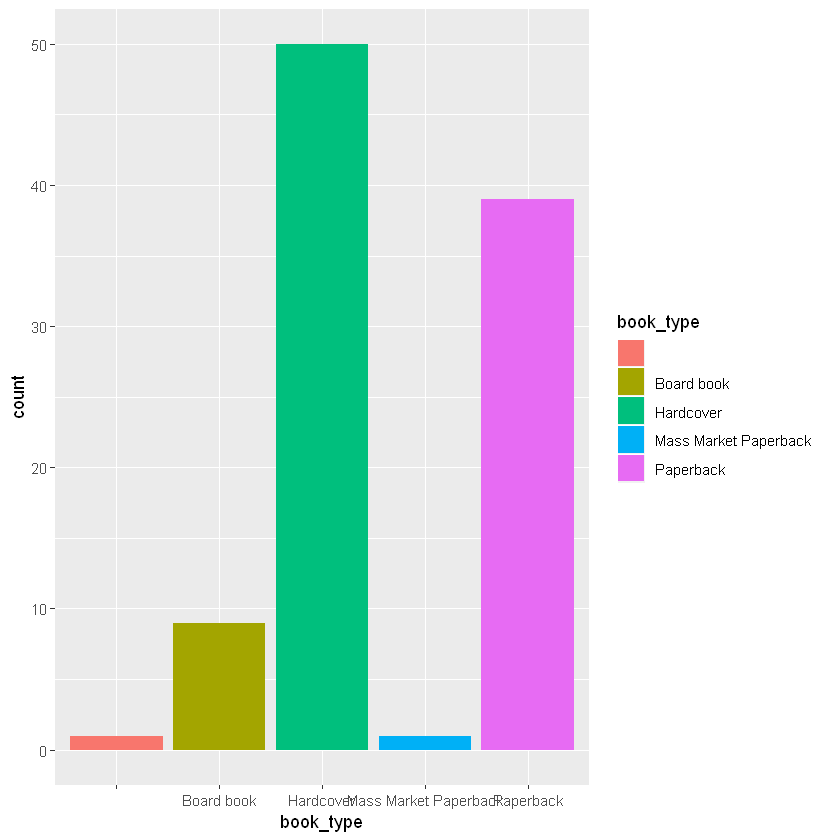

In [45]:
# 5. WHich type of book has sold a lot ?

max_type_sold <- amazon_books %>% group_by(book_type) %>% summarise(num_of_books = n()) %>% 
                  arrange(desc(num_of_books))

max_type_sold

ggplot(data = amazon_books) + geom_bar(mapping = 
                                         aes(x=book_type,fill = book_type))

Warning message in plot.window(xlim, ylim, "", ...):
""color" is not a graphical parameter"Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
""color" is not a graphical parameter"Warning message in axis(1, ...):
""color" is not a graphical parameter"Warning message in axis(2, ...):
""color" is not a graphical parameter"

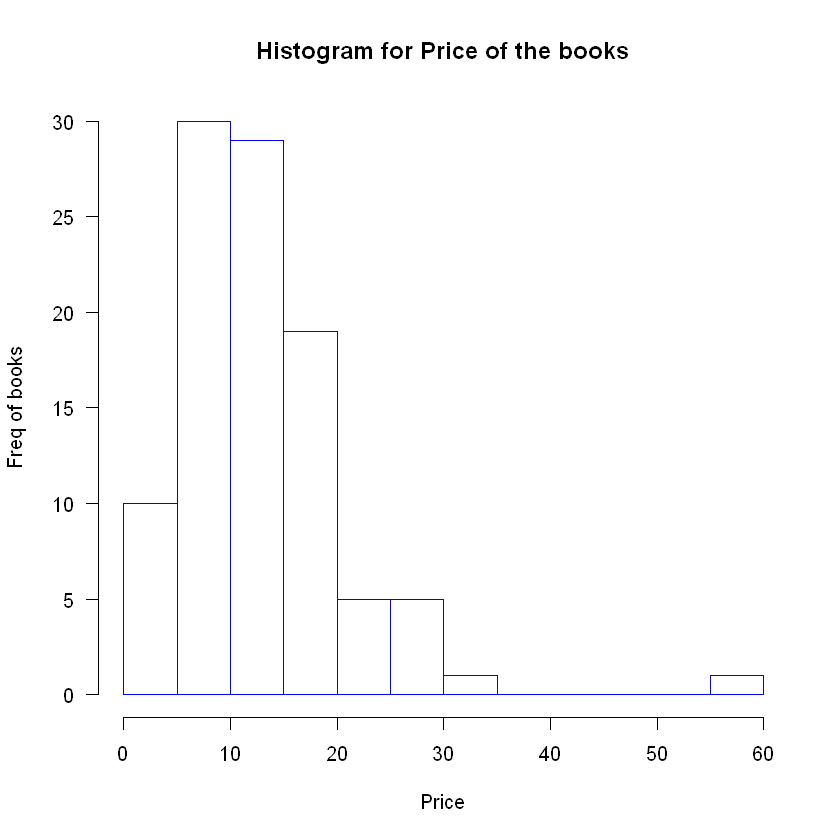

In [53]:
# 6. What is the price range, that is most present in the top 100 ?
  
  # plot histogram
  hist(amazon_books$price,
       main = "Histogram for Price of the books",
       xlab = "Price",
       ylab = "Freq of books",
       border = "blue",
       color = "blue",
       las = 1) # rotates the values printed on the y-axis by 1

# Insigts drawn - Max books fall in the range $5 to $15.
  

Warning message:
"Continuous x aesthetic -- did you forget aes(group=...)?"

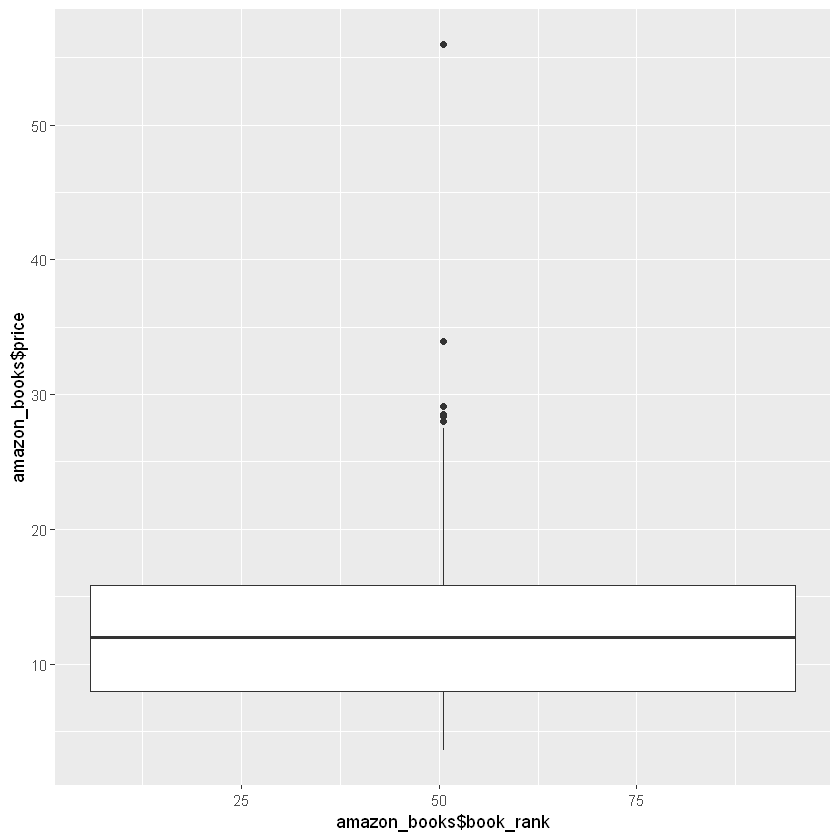

In [54]:
# 7. boxplot to see the price data distribution
ggplot(amazon_books,
       aes(x = amazon_books$book_rank,y = amazon_books$price)) + 
  geom_boxplot()

# Insights - 2 books have extreme values !

[1] 1-10 1-10 1-10 1-10 1-10 1-10
Levels: 1-10 11-20 21-30 31-40 41-50 51-60 61-70 71-80 81-90 91-100

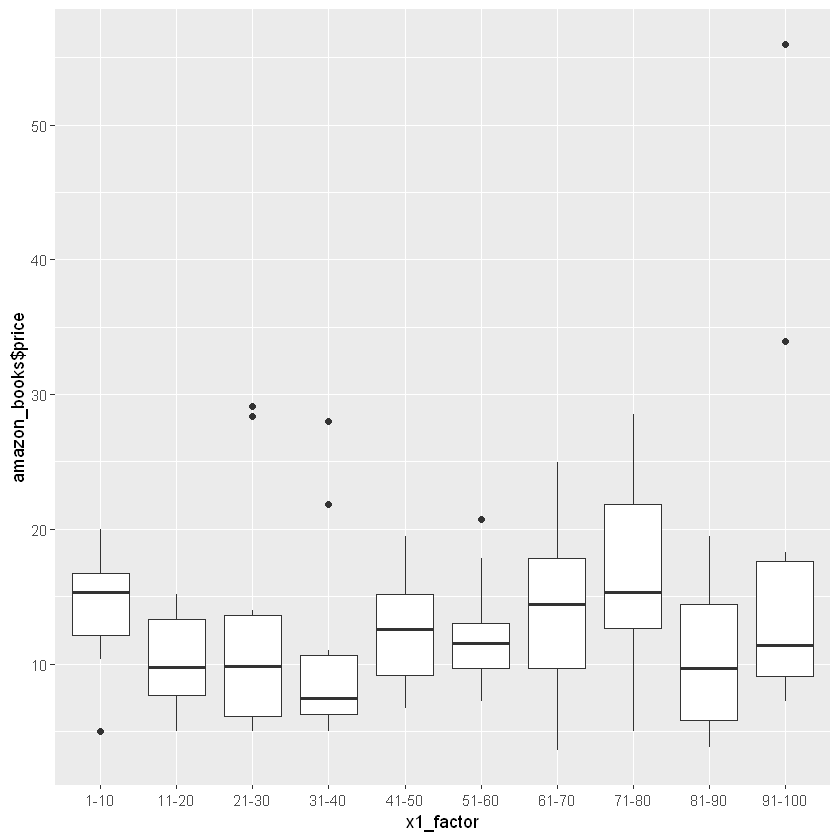

In [55]:
# 8. boxplot for price for every 10 books

x1 <- 1:100
x1_factor <- cut(x = x1, breaks = c(0,10,20,30,40,50,60,70,80,90,100),
      labels = c('1-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100'))
head(x1_factor)

ggplot(amazon_books,
       aes(x=x1_factor,y=amazon_books$price))+
  geom_boxplot()

# Insights - Book with ranks 71 to 80, are pricier when compared to the rest.

In [59]:
# 9. Common books in the NYT and Amazon top 100 books are - 
# combine nyt_tibble amazon_books tibble
common_books <- inner_join(nyt_tibble,amazon_books, by="book_name")
common_books


# Insight - It would be interesting to know the metrics used by NYT to list the best selling books as only 10 match
# out of 100 with Amazon's list


book_name,genre,book_rank,author,stars,reviews,book_type,price
The Wonderful Things You Will Be,children,28,Emily Winfield Martin,4.8,1955,Hardcover,10.79
Dragons Love Tacos,children,74,Adam Rubin,4.5,2347,Hardcover,8.49
Wonder,children,52,R. J. Palacio,4.9,13303,Hardcover,12.72
Where the Crawdads Sing,fiction,70,Delia Owens,4.8,13562,Hardcover,15.60
Before We Were Yours,fiction,57,Lisa Wingate,4.7,9706,Hardcover,11.09
Little Fires Everywhere,fiction,43,Celeste Ng,4.3,4037,Hardcover,14.99
The Woman in the Window,fiction,75,A. J. Finn,4.3,5651,Hardcover,15.89
Educated,non-fiction,17,Tara Westover,4.7,7507,Hardcover,15.18
Becoming,non-fiction,1,Michelle Obama,4.9,14110,Hardcover,19.50
The Hate U Give,young_adult,25,Angie Thomas,4.8,3446,Hardcover,13.95
